# 서울시 구별 CCTV 현황 분석하기



* 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
* 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# '01. CCTV_in_Seoul.csv' 파일 읽기
CCTV_Seoul = pd.read_csv('01. CCTV_in_Seoul.csv')
CCTV_Seoul.head()
CCTV_Seoul.describe()

,소계,2013년도 이전,2014년,2015년,2016년
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1179.080000,764.760000,159.480000,205.200000,385.880000
std,556.728983,415.510257,104.132976,137.877059,182.479981
min,485.000000,238.000000,21.000000,30.000000,81.000000
25%,748.000000,464.000000,78.000000,103.000000,292.000000
50%,1015.000000,573.000000,142.000000,184.000000,377.000000
75%,1496.000000,1070.000000,218.000000,269.000000,467.000000
max,2780.000000,1843.000000,430.000000,584.000000,932.000000


In [3]:
#column명 출력
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
#값만 출력
CCTV_Seoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [5]:
CCTV_Seoul.columns[0]

'기관명'

In [6]:
# 칼럼명 :'기관명' -> '구별' 수정
CCTV_Seoul=CCTV_Seoul.rename(columns={'기관명':'구별'})

##  엑셀파일 읽기 - 서울시 인구현황

In [7]:
# 01. population_in_Seoul.xls 파일 열기
pop_Seoul = pd.read_excel("01. population_in_Seoul.xls")
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [8]:
pop_Seoul = pd.read_excel('01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N',
                          encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
# 칼럼명 수정

pop_Seoul=pop_Seoul.rename(columns={'자치구':'구별','계':'인구수',"계.1":'한국인','계.2':'외국인','65세이상고령자':'고령자'})
pop_Seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


#  CCTV 데이터 파악하기

In [10]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [11]:
# 소계를 기준으로 오름차순 정렬

CCTV_Seoul.sort_values('소계').head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [12]:
# 소계를 중심으로 내림차순 정렬

CCTV_Seoul.sort_values('소계',ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [13]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [19]:
# 16년 증가율 구하기
CCTV_Seoul['16년증가율'] = CCTV_Seoul['2016년']-CCTV_Seoul['2015년']  * 100/ CCTV_Seoul['2015년'] 
CCTV_Seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,16년증가율
0,강남구,2780,1292,430,584,932,832.0
1,강동구,773,379,99,155,377,277.0
2,강북구,748,369,120,138,204,104.0
3,강서구,884,388,258,184,81,-19.0
4,관악구,1496,846,260,390,613,513.0
5,광진구,707,573,78,53,174,74.0
6,구로구,1561,1142,173,246,323,223.0
7,금천구,1015,674,51,269,354,254.0
8,노원구,1265,542,57,451,516,416.0
9,도봉구,485,238,159,42,386,286.0


#  서울시 인구 데이터 파악하기

In [20]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [21]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


In [22]:
# 첫번째 row 삭제, 원본데이터 반영
pop_Seoul.drop(0,inplace=True)

In [23]:
# 구별 칼럼의 unique값 구하기
CCTV_Seoul.구별.unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [24]:
CCTV_Seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,16년증가율
0,강남구,2780,1292,430,584,932,832.0
1,강동구,773,379,99,155,377,277.0
2,강북구,748,369,120,138,204,104.0
3,강서구,884,388,258,184,81,-19.0
4,관악구,1496,846,260,390,613,513.0
5,광진구,707,573,78,53,174,74.0
6,구로구,1561,1142,173,246,323,223.0
7,금천구,1015,674,51,269,354,254.0
8,노원구,1265,542,57,451,516,416.0
9,도봉구,485,238,159,42,386,286.0


In [25]:
# '구별'칼럼에서 결측치가 있는 row구하기
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [28]:
# '구별'칼럼에서 결측치가 있는 row 삭제하기
pop_Seoul.dropna(inplace=True)
pop_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [29]:
# 구별 외국인 비율/ 고령자 비율 구하기
pop_Seoul['외국인비율'] = pop_Seoul['외국인']/pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자']/pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [30]:
# 인구수 기준 내림차순 정렬
pop_Seoul.sort_values('인구수',ascending=False,inplace=True)

In [31]:
# 외국인수 기준 내림차순 정렬
pop_Seoul.sort_values('외국인',ascending=False,inplace=True)

In [32]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [33]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [34]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


#  CCTV 데이터와 인구 데이터 합치고 분석하기

In [37]:
# '구별'칼럼을 기준으로 cctv데이터와 인구데이터를 합하기

data_result=CCTV_Seoul.merge(pop_Seoul,on='구별')
data_result.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,16년증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,832.0,570500.0,565550.0,4950.0,63167.0,0.86766,11.072217


In [38]:
# 2013년도 이전, 2014년, 2015년, 2016년 칼럼 삭제
data_result.drop('2013년도 이전',axis=1,inplace=True)
data_result.drop('2014년',axis=1,inplace=True)
data_result.drop('2015년',axis=1,inplace=True)
data_result.drop('2016년',axis=1,inplace=True)

In [42]:
# '구별' 칼럼을 인덱스로 설정
data_result.set_index('구별')

,소계,16년증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,832.0,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,277.0,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,104.0,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,-19.0,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,513.0,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
광진구,707,74.0,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
구로구,1561,223.0,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
금천구,1015,254.0,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
노원구,1265,416.0,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883


In [33]:
# 고령자 비율과 소계의 상관계수



array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [34]:
# 외국인 비율과 소계의 상관계수



array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [35]:
# 인구수와 소계의 상관계수



array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [36]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,16년증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,93300.0,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,46800.0,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,39900.0,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,46900.0,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,39900.0,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [37]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,16년증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,46400.0,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,8200.0,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,93300.0,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,51700.0,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,61400.0,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


#  CCTV와 인구현황 그래프로 분석하기

In [40]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [41]:
data_result.head()

,소계,16년증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,93300.0,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,37800.0,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,20500.0,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,8200.0,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,61400.0,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


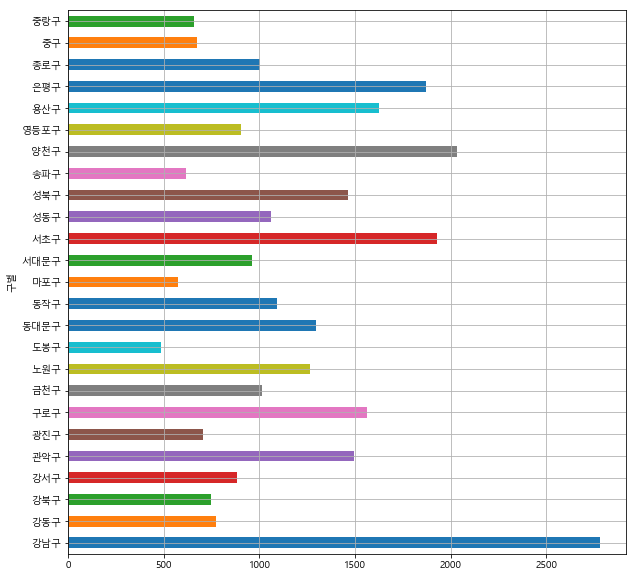

In [42]:
# '소계' 칼럼을 기준으로 수평 바챠트



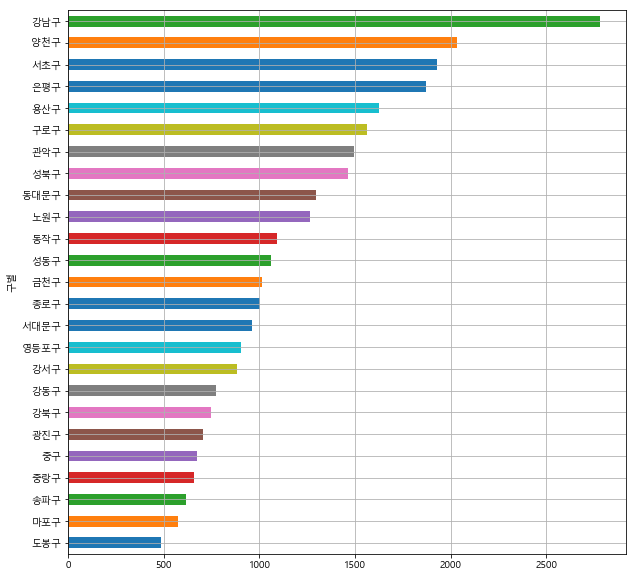

In [43]:
# '소계'칼럼을 내림차순 정렬 후 수평 바챠트


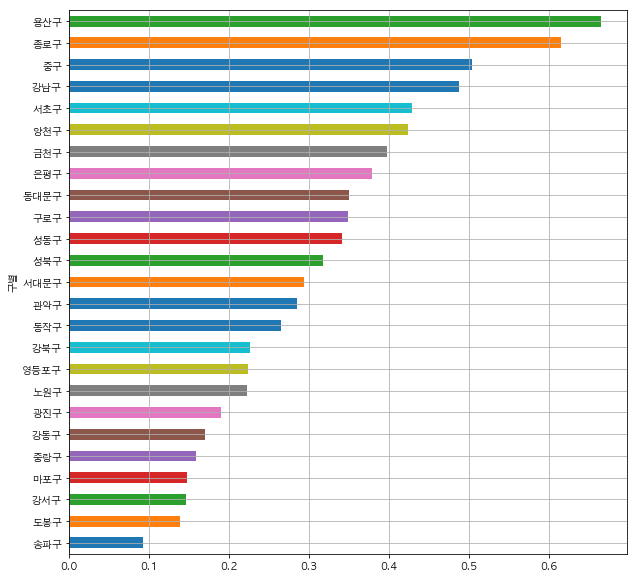

In [128]:
# 1인당 CCTV비율 정렬후 수평 바챠트



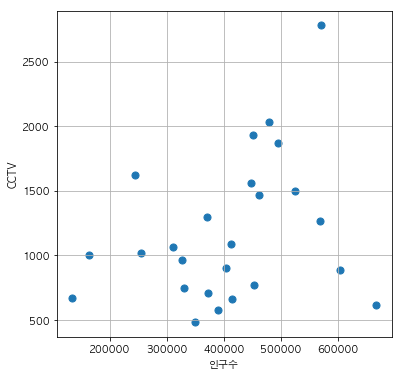

In [129]:
# '인구수'와 '소계'의 분포도 그리기



In [130]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [131]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

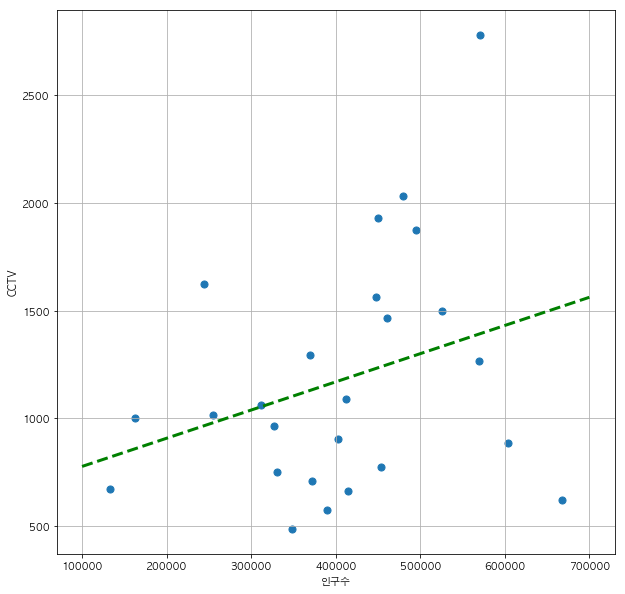

In [132]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

#  조금더 설득력 있는 자료 만들기

In [133]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


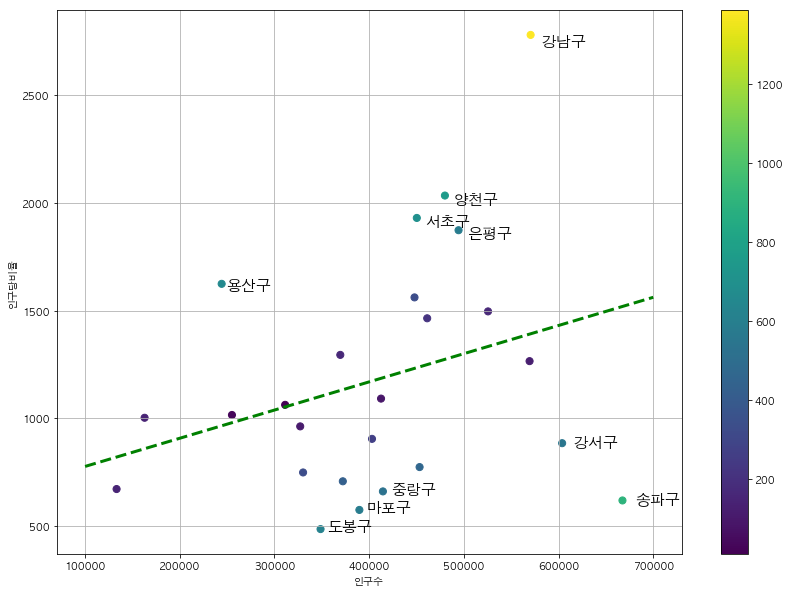

In [134]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다